In [1]:
import pandas as pd
from matplotlib.ticker import FuncFormatter

from matplotlib import pyplot as plt
%matplotlib inline
import pymysql.cursors


In [2]:
connection = pymysql.connect(host='localhost', user='root', password='a', db='popu-gta', charset='utf8mb4',
                            cursorclass=pymysql.cursors.DictCursor)
try:
    with connection.cursor() as cursor:
        sql = "SELECT Ppcount, district from GTApopulation where 1"       
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    pass

[{'Ppcount': 89019, 'district': 'Markham'}, {'Ppcount': 49613, 'district': 'RichmondHill'}, {'Ppcount': 235872, 'district': 'Toronto'}, {'Ppcount': 14742, 'district': 'Vaughan'}, {'Ppcount': 32886, 'district': 'Mississauga'}, {'Ppcount': 10206, 'district': 'NewMarket'}, {'Ppcount': 11624, 'district': 'Oakville'}, {'Ppcount': 8505, 'district': 'Aurota'}, {'Ppcount': 8222, 'district': 'Hamilton'}]


In [3]:
result

[{'Ppcount': 89019, 'district': 'Markham'},
 {'Ppcount': 49613, 'district': 'RichmondHill'},
 {'Ppcount': 235872, 'district': 'Toronto'},
 {'Ppcount': 14742, 'district': 'Vaughan'},
 {'Ppcount': 32886, 'district': 'Mississauga'},
 {'Ppcount': 10206, 'district': 'NewMarket'},
 {'Ppcount': 11624, 'district': 'Oakville'},
 {'Ppcount': 8505, 'district': 'Aurota'},
 {'Ppcount': 8222, 'district': 'Hamilton'}]

In [4]:
pop_pd = pd.DataFrame(result)
pop_pd  # population

,Ppcount,district
0,89019,Markham
1,49613,RichmondHill
2,235872,Toronto
3,14742,Vaughan
4,32886,Mississauga
5,10206,NewMarket
6,11624,Oakville
7,8505,Aurota
8,8222,Hamilton


In [5]:
pop_pd.set_index('district', inplace=True)

In [6]:
pop_pd  # population

,Ppcount
district,
Markham,89019
RichmondHill,49613
Toronto,235872
Vaughan,14742
Mississauga,32886
NewMarket,10206
Oakville,11624
Aurota,8505
Hamilton,8222


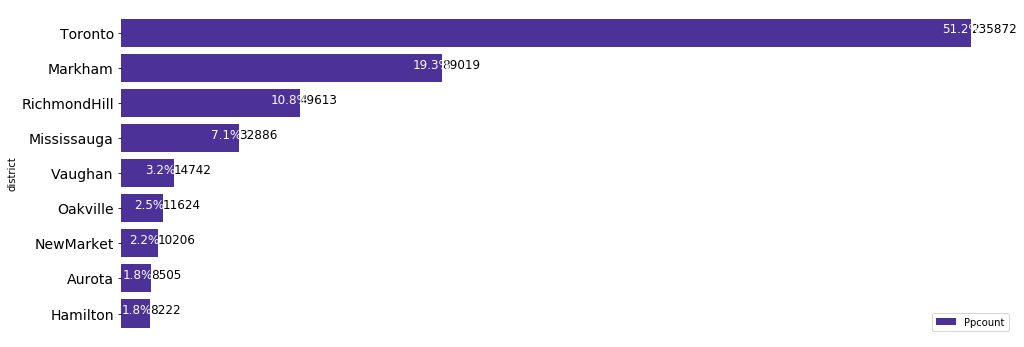

In [126]:
pop_pd.sort_values('Ppcount',ascending=True, inplace=True)
pop_ax = pop_pd.plot(kind='barh', y='Ppcount', figsize=(16,6), stacked=True, width=0.8, rot=0, color='#4c3298', fontsize=14)
pop_ax.spines['right'].set_visible(False)
pop_ax.spines['top'].set_visible(False)
pop_ax.spines['left'].set_visible(False)
pop_ax.spines['bottom'].set_visible(False)
pop_ax.axes.get_xaxis().set_visible(False)
pop_ax.set_xlabel("Area", labelpad=20, size=16)
for tick in pop_ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for i, v in enumerate(pop_pd.Ppcount):
    pop_ax.text(v + 3, i, str(v), color='black', fontsize=12)
totals = []
for n in pop_ax.patches:
    totals.append(n.get_width())
total = sum(totals)    
# total = len(pop_pd.Ppcount)
for p in pop_ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        pop_ax.text(x-8000, y,str(percentage), fontsize=12, color='white')   
plt.show()


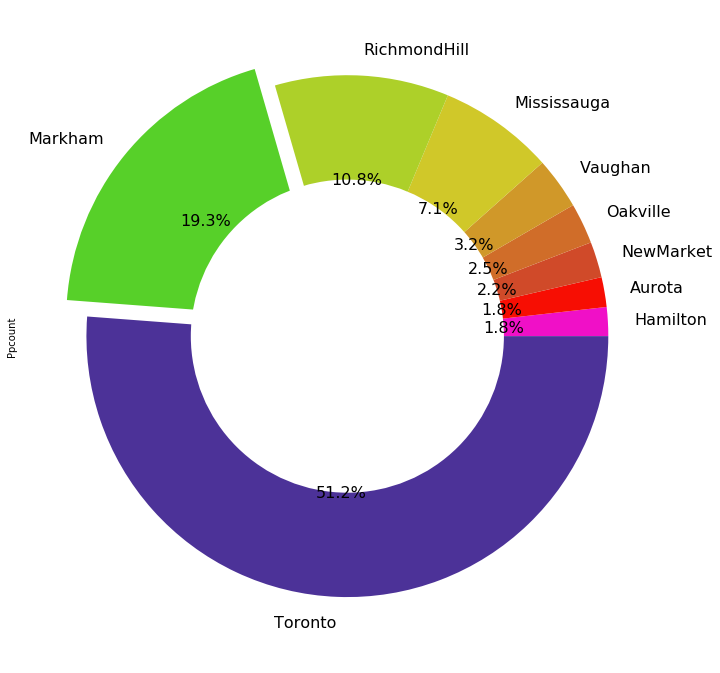

In [125]:
explode=(0, 0, 0, 0, 0, 0, 0, 0.1, 0)
colors = ['#f010c7','#f70e03','#d04a29','#d06d29','#d09829','#d0c829','#add029','#57d029','#4c3298']

pop_pd.plot.pie(subplots=True, figsize=(12,12), autopct='%1.1f%%', fontsize=16, explode=explode, legend=False, colors=colors)

# nested pie
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.tight_layout()
plt.show()

In [9]:
try:
    with connection.cursor() as cursor:
        sql = "SELECT Age, Users from agedist where 1"       
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    pass

[{'Users': 28314, 'Age': '18-24'}, {'Users': 111276, 'Age': '25-34'}, {'Users': 120879, 'Age': '35-44'}, {'Users': 78804, 'Age': '45-54'}, {'Users': 30195, 'Age': '55-64'}, {'Users': 16731, 'Age': '65+'}, {'Users': 386199, 'Age': 'total'}]


In [10]:
age_df = pd.DataFrame(result)
age_df

,Age,Users
0,18-24,28314
1,25-34,111276
2,35-44,120879
3,45-54,78804
4,55-64,30195
5,65+,16731
6,total,386199


In [11]:
age_df = age_df[:-1]

In [12]:
age_df.set_index('Age', inplace=True)

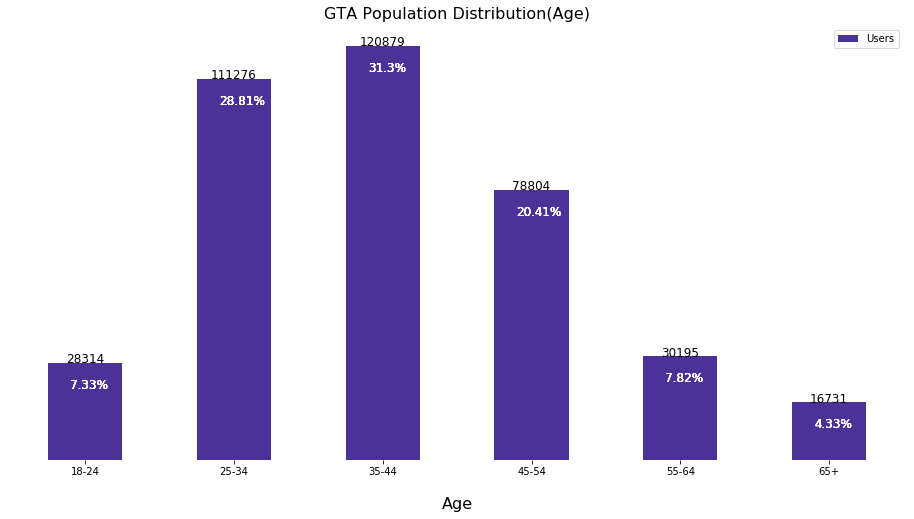

In [122]:
age_ax =age_df.plot.bar(y='Users', figsize=(16,8), stacked=True, width=0.5, rot=0, color='#4c3298')
age_ax.spines['right'].set_visible(False)
age_ax.spines['top'].set_visible(False)
age_ax.spines['left'].set_visible(False)
age_ax.spines['bottom'].set_visible(False)
age_ax.axes.get_yaxis().set_visible(False)
age_ax.set_xlabel("Age", labelpad=20, size=16)
for tick in pop_ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

plt.title("GTA Population Distribution(Age)",fontsize=16)
totals = []
for n in age_ax.patches:
    totals.append(n.get_height())
total = sum(totals)
for i, v in enumerate(age_df.Users):
    plt.text( i,v,age_df.Users[i], fontsize=12, color='black', ha='center')

    for p in age_ax.patches:
        
        age_ax.text(p.get_x()+0.15, p.get_height()-7500, \
            str(round((p.get_height()/total)*100, 2))+'%', fontsize=12,
                color='white')     
    
plt.show()

In [24]:
# age_df.plot.pie(y='Users', figsize=(12,12))
# plt.show()

In [17]:
try:
    with connection.cursor() as cursor:
        sql = "SELECT Gender, Users from genderdist where 1"       
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    connection.close()

[{'Users': 2010, 'Gender': 'male'}, {'Users': 1973, 'Gender': 'female'}]


In [18]:
gender_df = pd.DataFrame(result)
gender_df.set_index(gender_df.Gender, inplace= True)

In [23]:
# gender_df.plot.bar(y='Users', figsize=(16,8))
# plt.show()

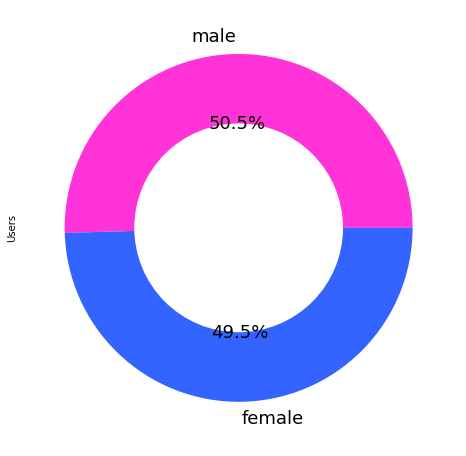

In [115]:

colors = ['#ff33d7','#3364ff']
gender_df.plot.pie(y='Users', figsize=(8,8), fontsize=18, autopct='%1.1f%%', colors=colors, legend=False)
# nested pie
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()